In [31]:
import pandas as pd
import numpy as np
import category_encoders as ce
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import sklearn
# suppress warning messages
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("/Users/liamsweeney/dat-11-15/ClassMaterial/Unit3/data/ks2.csv")

In [18]:
df

,ID,name,category,main_category,currency,deadline,launched,state,country,goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,2015-08-11 12:12:28,0,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,2017-09-02 04:43:57,0,US,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,2013-01-12 00:20:50,0,US,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 00:00:00,2012-03-17 03:24:11,0,US,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 00:00:00,2015-07-04 08:35:03,0,US,19500.00
...,...,...,...,...,...,...,...,...,...,...
370449,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 00:00:00,2014-09-17 02:35:30,0,US,50000.00
370450,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 00:00:00,2011-06-22 03:35:14,0,US,1500.00
370451,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 00:00:00,2010-07-01 19:40:30,0,US,15000.00
370452,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 00:00:00,2016-01-13 18:13:53,0,US,15000.00


In [19]:
# helper functions to aid in the process
def split_data(df, split_frac=0.2, random_state=42):
    df = df.drop(['deadline', 'launched'], axis = 1)
    X  = df.drop('state', axis=1)
    y  = df['state']
    # notice the use of 'stratify' -- makes sure y values are in equal proportions in train + test
    return train_test_split(X, y, test_size = split_frac, stratify = y, random_state = random_state)

# helper function to pull out feature importances_
def get_feature_importances(pipe, X_train, onehot=False):
    if onehot:
        X_train = pipe[0].transform(X_train)
        X_train = pipe[1].transform(X_train)
    return pd.DataFrame({
        'Col': X_train.columns,
        'Importance': pipe[-1].feature_importances_
    }).sort_values(by='Importance', ascending=False)
# a variation of what we did previously -- gives us option of getting training / validation / test scores
# in a single function
def get_model_scores(mod, X_train, y_train, X_test, y_test, val_score = True, test_score=False):
    if val_score:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                          test_size = 0.2, 
                                                          stratify = y_train, 
                                                          random_state= 42)
 
    mod.fit(X_train, y_train)
    
    results = {}
    
    results['train_score'] = mod.score(X_train, y_train)
    if val_score:
        results['val_score'] = mod.score(X_val, y_val)
        
    if test_score:
        results['test_score'] = mod.score(X_test, y_test)
        
    return results

In [5]:
def get_feature_importances(pipe, X_train, onehot=False):
    if onehot:
        # this section is based on the assumption that we are using a OneHotEncoder + An additional one for name
        X_train = pipe[0].transform(X_train)
        X_train = pipe[1].transform(X_train)
    return pd.DataFrame({
        'Col': X_train.columns,
        'Importance': pipe[-1].feature_importances_
    }).sort_values(by='Importance', ascending=False)

In [6]:
# split data
X_train, X_test, y_train, y_test = split_data(df)

# create pipe and get model score



In [7]:
te   = ce.TargetEncoder(min_samples_leaf = 30)
# setting eval_metric here to avoid a warning message -- does not really change anything though
mod  = XGBClassifier(eval_metric = 'logloss')


In [8]:
pipe = make_pipeline(te, mod)



In [9]:
scores = get_model_scores(pipe, X_train, y_train, X_test, y_test, test_score = True)

# initial scores are closely aligned, will leave test set alone for now


In [10]:
scores

{'train_score': 0.6991522206756928,
 'val_score': 0.6874799655829804,
 'test_score': 0.6884776828494689}

In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


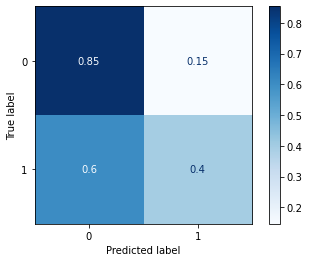

In [33]:

plot_confusion_matrix(pipe, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true');

In [29]:
classification_report(y_test, pipe.predict(X_test), normalize = 'true')

TypeError: classification_report() got an unexpected keyword argument 'normalize'

In [ ]:
wght = 1 / 

In [32]:
print(sklearn.__version__)

1.0.1


In [31]:
feats = get_feature_importances(pipe, X_train)
feats

,Col,Importance
2,category,0.523398
6,goal,0.205392
5,country,0.103629
3,main_category,0.072589
4,currency,0.060460
0,ID,0.034531
1,name,0.000000


In [32]:
ohe = ce.OneHotEncoder(cols = ['category', 'country', 'currency'], use_cat_names = True)
te  = ce.TargetEncoder()

pipe = make_pipeline(ohe, te, mod)

scores = get_model_scores(pipe, X_train, y_train, X_test, y_test)

# initial scores are closely aligned, will leave test set alone for now
scores

{'train_score': 0.6977772154034333, 'val_score': 0.6883572621598367}

In [33]:
feats = get_feature_importances(pipe, X_train, onehot=True)
feats

,Col,Importance
58,category_Hip-Hop,0.064007
161,main_category,0.050888
28,category_Tabletop Games,0.041593
8,category_Shorts,0.034393
176,country_US,0.029721
...,...,...
77,category_Cookbooks,0.000000
61,category_Gaming Hardware,0.000000
175,currency_JPY,0.000000
47,category_Rock,0.000000


In [34]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

# let 'er rip
df['deadline_days'] = df['deadline'].dt.day
df['deadline_mo']   = df['deadline'].dt.month
df['deadline_year'] = df['deadline'].dt.year
df['time']          = (df['deadline'] - df['deadline'].min()).dt.days
df['duration']      = (df['deadline'] - df['launched'].min()).dt.days
df['deadline_dow']  = df['deadline'].dt.dayofweek
df['deadline_week'] = df['deadline'].dt.week

# let 'er rip
df['launched_days'] = df['launched'].dt.day
df['launched_mo']   = df['launched'].dt.month
df['launched_year'] = df['launched'].dt.year
df['launched_dow']  = df['launched'].dt.dayofweek
df['launched_week'] = df['launched'].dt.week

In [35]:
# re split and score
X_train, X_test, y_train, y_test = split_data(df)

# very modest difference -- will keep for now, even though it seems to have a small difference
scores = get_model_scores(pipe, X_train, y_train, X_test, y_test)
scores

KeyboardInterrupt: 

In [17]:
feats = get_feature_importances(pipe, X_train, onehot=True)
feats

,Col,Importance
58,category_Hip-Hop,0.067006
161,main_category,0.053235
28,category_Tabletop Games,0.042709
8,category_Shorts,0.028079
14,category_Apps,0.026539
...,...,...
173,currency_HKD,0.000000
57,category_Journalism,0.000000
175,currency_JPY,0.000000
50,category_Punk,0.000000


In [18]:
# category averages
train_idx = X_train.index

# averages by category
# do you know why we're only grabbing the indices in the training set?
cat_avgs      = df.iloc[train_idx].groupby('category')['goal'].mean().to_frame().rename({'goal': 'cat_avg'}, axis = 1)
df            = df.merge(cat_avgs, left_on = 'category', right_index = True )
df['cat_avg'] = df['goal'] / df['cat_avg']

# and now our new data
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,goal,...,time,duration,deadline_dow,deadline_week,launched_days,launched_mo,launched_year,launched_dow,launched_week,cat_avg
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,GB,1533.95,...,2350,16716,4,41,11,8,2015,1,33,0.286323
232,1001028167,Steel Cathedrals- Short poems for the digital ...,Poetry,Publishing,GBP,2013-07-28,2013-06-28 23:17:04,0,GB,6060.97,...,1547,15913,6,30,28,6,2013,4,26,1.131324
318,1001468086,Bass River Press,Poetry,Publishing,USD,2015-04-05,2015-03-06 19:58:58,0,US,2000.00,...,2163,16529,6,14,6,3,2015,4,10,0.373315
414,1001991458,Poems For Apostates & tales of a young Sciento...,Poetry,Publishing,USD,2014-05-31,2014-05-01 17:47:49,0,US,10000.00,...,1854,16220,5,22,1,5,2014,3,18,1.866573
517,1002519316,"Your poem, by me.",Poetry,Publishing,CAD,2015-10-31,2015-10-01 20:00:32,0,CA,757.52,...,2372,16738,5,44,1,10,2015,3,40,0.141397


In [19]:
# averages by category / country
country_avgs      = df.iloc[train_idx].groupby(['country', 'category'])['goal'].mean().to_frame().rename({'goal': 'country_avg'}, axis = 1)
df                = df.merge(country_avgs, left_on = ['country', 'category'], right_index = True)
df['country_avg'] = df['goal'] / df['country_avg']

# re - split & score
X_train, X_test, y_train, y_test = split_data(df)
scores                           = get_model_scores(pipe, X_train, y_train, X_test, y_test)

# and scores
scores

{'train_score': 0.7189349736527906, 'val_score': 0.699022900248072}



So far it seems that the additional info that we've created does not add a lot of additional predictive value. However, before ditching it, we'll keep all of it during parameter tuning. The idea is that it's possible certain types of interactions and features might be picked up during later boosting rounds that we cannot see now.

We'll look at parameter tuning using the way we've always done it, as well as a more convenient wrapper called GridSearch, which we'll use in the next cell.


In [20]:
# parameter search
estimators = [100, 200, 300, 400]
max_depth  = [3, 4]
sub_sample = [0.8, 0.6] # this is the amount of samples to randomly sample in each round
cv_scores  = []

# do a training loop
for estimator in estimators:
    for depth in max_depth:
        for sample in sub_sample:
            print(f"Fitting new training loop for rounds: {estimator}, depth: {depth}, sampling rate: {sample}")
            pipe[-1].set_params(n_estimators = estimator, max_depth = depth, subsample = sample)
            scores = get_model_scores(pipe, X_train, y_train, X_test, y_test)
            cv_scores.append((scores['train_score'], scores['val_score'], estimator, depth, sample))

Fitting new training loop for rounds: 100, depth: 3, sampling rate: 0.8
Fitting new training loop for rounds: 100, depth: 3, sampling rate: 0.6
Fitting new training loop for rounds: 100, depth: 4, sampling rate: 0.8
Fitting new training loop for rounds: 100, depth: 4, sampling rate: 0.6
Fitting new training loop for rounds: 200, depth: 3, sampling rate: 0.8
Fitting new training loop for rounds: 200, depth: 3, sampling rate: 0.6
Fitting new training loop for rounds: 200, depth: 4, sampling rate: 0.8
Fitting new training loop for rounds: 200, depth: 4, sampling rate: 0.6
Fitting new training loop for rounds: 300, depth: 3, sampling rate: 0.8
Fitting new training loop for rounds: 300, depth: 3, sampling rate: 0.6
Fitting new training loop for rounds: 300, depth: 4, sampling rate: 0.8
Fitting new training loop for rounds: 300, depth: 4, sampling rate: 0.6
Fitting new training loop for rounds: 400, depth: 3, sampling rate: 0.8
Fitting new training loop for rounds: 400, depth: 3, sampling ra

In [ ]:
# and we'll now go ahead and find the best parameter values
max(cv_scores, 
    key = lambda x: x[1]) # this is to grab the second item in each tuple

In [ ]:
# set the parameters
pipe[-1].set_params(n_estimators = 400, max_depth = 4, subsample = 0.8)

# and finally get our test score
scores = get_model_scores(pipe, X_train, y_train, X_test, y_test, val_score = False, test_score = True)

In [ ]:
# scores
scores



A couple of points to note here is that our best performing model is also our most complicated, suggesting that we probably have more parameter space to explore in order to maximize performance.

It's also true that the spread of values does not seem to be that large, so there's a good chance increasing the size of the model will only bring modest improvements.

For now, let's stop and continue on with our test set and PDP


In [ ]:
# set the parameters
pipe[-1].set_params(n_estimators = 400, max_depth = 4, subsample = 0.8)

# and finally get our test score
scores = get_model_scores(pipe, X_train, y_train, X_test, y_test, val_score = False, test_score = True)

In [ ]:
# scores
scores

We can see we got pretty good alignment between training and test scores, suggesting that our validation technique was sound.

We'll now go ahead and look at a simplified way or searching parameters. It fundamentally goes the same thing, but allows you to load in all of the parameters at once without having to go through a complicated loop. It's known as GridSearch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [ ]:
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300, 400],
    'xgbclassifier__max_depth': [3, 4, 5],
    'xgbclassifier__max_features': [0.6, 0.8, 1],
    'xgbclassifier__subsample': [0.6, 0.8, 0.1]
}

# we'll apply this option for faster fitting -- a nice feature of xgboost
pipe[-1].set_params(tree_method = 'hist')

# import a splitter - way to automatically split your data for you
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 3)

grid = GridSearchCV(pipe, param_grid, cv = kfold, verbose = 1)
grid.fit(X_train, y_train)

In [ ]:
# this will give us the best results from the search
grid.best_params_


Partial Dependence

With our modeling behind us, we'll now go ahead and pull some PDP charts to see what types of patterns were found inside of our final fitted model. Since category and goal were two important features, we'll look at those two.
Your Turn:

Now that we've finished with this, try and create PDP plots to answer the following questions:

    what is the overall relationship between fundraising amount and your chance of completing a successful campaign?
    what campaigns give you the highest probability of successfully completing a campaign? The lowest?
    if you have any ambitions for running a campaign, how would the intersection of your campaign category and your desired fundraising amount interact?

from pdpbox import pdp, info_plots

# go ahead and transform X_train to prep it for PDPBox
# the model is already fitted so we don't have to worry about doing that
X_train = pipe[0].transform(X_train)
X_train = pipe[1].transform(X_train)

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-62-14bfb36aaf96> in <module>
----> 1 from pdpbox import pdp, info_plots
      2 
      3 # go ahead and transform X_train to prep it for PDPBox
      4 # the model is already fitted so we don't have to worry about doing that
      5 X_train = pipe[0].transform(X_train)

ModuleNotFoundError: No module named 'pdpbox'




Your Turn:

Now that we've finished with this, try and create PDP plots to answer the following questions:

    what is the overall relationship between fundraising amount and your chance of completing a successful campaign?
    what campaigns give you the highest probability of successfully completing a campaign? The lowest?
    if you have any ambitions for running a campaign, how would the intersection of your campaign category and your desired fundraising amount interact?



In [ ]:
from pdpbox import pdp, info_plots

# go ahead and transform X_train to prep it for PDPBox
# the model is already fitted so we don't have to worry about doing that
X_train = pipe[0].transform(X_train)
X_train = pipe[1].transform(X_train)

In [ ]:
# what was the additive impact of different values of goal?  What was its marginal impact?
pdp_day_of_week = pdp.pdp_isolate(
    model=pipe[-1], 
    dataset=X_train[X_train['goal'] < X_train['goal'].quantile(.95)], # filtering out unusually large values
    model_features=X_train.columns.tolist(), 
    feature='goal',
)

fig, axes = pdp.pdp_plot(pdp_day_of_week, 'Fundraising Amount', plot_lines=True, frac_to_plot=100)

In [ ]:
cat_cols = [col for col in X_train.columns if 'category' in col and col != 'main_category']
cat_cols

In [ ]:
pdp_cat = pdp.pdp_isolate(
    # dataset -- create the final transformation of our data
    model= pipe[-1], dataset=X_train, model_features=X_train.columns.tolist(), 
    # this is the list of all the columns for the genre feature
    feature=cat_cols
)

fig, axes = pdp.pdp_plot(pdp_cat, 'Category', plot_lines=True, frac_to_plot=100)
# this code is just for formatting -- getting the labels to format correctly
xtick_labels = [cat.split('_')[1] for cat in cat_cols]
axes['pdp_ax'].set_xticklabels(xtick_labels, rotation='vertical');